<a href="https://colab.research.google.com/github/Vijayalakshmi-42/person_detection/blob/main/Untitled14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python-headless numpy

In [2]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2025-12-30 08:23:35--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 172.67.185.199, 104.21.88.156, 2606:4700:3037::6815:589c, ...
Connecting to pjreddie.com (pjreddie.com)|172.67.185.199|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://data.pjreddie.com/files/yolov3.weights [following]
--2025-12-30 08:23:36--  https://data.pjreddie.com/files/yolov3.weights
Resolving data.pjreddie.com (data.pjreddie.com)... 172.67.185.199, 104.21.88.156, 2606:4700:3030::ac43:b9c7, ...
Connecting to data.pjreddie.com (data.pjreddie.com)|172.67.185.199|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  93.0MB/s    in 2.5s    

2025-12-30 08:23:38 (93.0 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [3]:
!wget wget https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg


--2025-12-30 08:27:49--  http://wget/
Resolving wget (wget)... failed: Name or service not known.
wget: unable to resolve host address ‘wget’
--2025-12-30 08:27:49--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg’

yolov3.cfg          100%[===================>]   8.15K  --.-KB/s    in 0s      

2025-12-30 08:27:49 (38.4 MB/s) - ‘yolov3.cfg’ saved [8342/8342]

FINISHED --2025-12-30 08:27:49--
Total wall clock time: 0.1s
Downloaded: 1 files, 8.1K in 0s (38.4 MB/s)


In [21]:
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names -O coco.names

# COCO (Common Objects in Context) is a large-scale object detection, segmentation, and captioning dataset.
# In the context of computer vision models like YOLO, 'coco.names' contains the list of object classes
# that the model is trained to detect. These typically include 80 common categories.

# The 'coco.names' file lists these class names, one per line.
# Below are the first few entries from the downloaded 'coco.names' file:
try:
    with open('coco.names', 'r') as f:
        classes = [line.strip() for line in f.readlines()]
        print("COCO object classes (first 10 out of {}):".format(len(classes)))
        for i, cls in enumerate(classes[:10]):
            print(f"{i+1}. {cls}")
        if len(classes) > 10:
            print("...")
except FileNotFoundError:
    print("The 'coco.names' file was not found. Please ensure it has been downloaded.")

# The original command to download 'coco.names' was:
# !wget https://github.com/pjreddie/darknet/blob/master/data/coco.names

--2025-12-30 09:21:24--  https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 625 [text/plain]
Saving to: ‘coco.names’

coco.names          100%[===================>]     625  --.-KB/s    in 0s      

2025-12-30 09:21:24 (26.4 MB/s) - ‘coco.names’ saved [625/625]

COCO object classes (first 10 out of 80):
1. person
2. bicycle
3. car
4. motorbike
5. aeroplane
6. bus
7. train
8. truck
9. boat
10. traffic light
...


In [40]:
from google.colab import files
upload = files.upload()

Saving image.jpg to image (1).jpg


In [41]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [42]:
#load yolo model
net = cv2.dnn.readNetFromDarknet('yolov3.cfg','yolov3.weights')
#load coco names
with open('coco.names','r') as f:
   classes = f.read().strip().split("\n")

#get output layers
layer_names = net.getLayerNames()
output_layers = [layer_names[i-1] for i in net.getUnconnectedOutLayers()]

#load image
img = cv2.imread('image.jpg')
height, width, channels = img.shape


In [43]:
#create blob
blob = cv2.dnn.blobFromImage(img,0.00392,(416,416),(0,0,0),True,crop=False)

net.setInput(blob)
outputs = net.forward(output_layers)
boxes = []
confidences = []

In [45]:
#process detection
person_class_id = classes.index('person') if 'person' in classes else 0 # Assuming 'person' is at index 0 if classes is correctly loaded

for output in outputs:
    for detection in output:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]

        # Detect only persons with a confidence threshold
        if confidence > 0.5 and class_id == person_class_id:
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))

In [46]:
#apply non max supression
indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

In [47]:
#drop bounding boxes and labels on the image
for i in indices:
    # i is already the index, no need for i = i[0]
    box = boxes[i]
    x, y, w, h = box
    label = classes[person_class_id] # Explicitly use person_class_id

    # Draw bounding box and label
    color = (0, 255, 0) # Green color for the bounding box
    cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
    cv2.putText(img, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

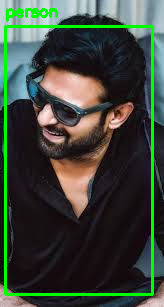

In [48]:
#show result
cv2_imshow(img)